In [58]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

# renderizar os gráficos diretamento no notebook
# %matplotlib inline 

In [59]:
train = pd.read_csv('dados/train.csv')
test = pd.read_csv('dados/test.csv')

In [60]:
# Quantas variáveis (colunas) e quantas entradas (linhas) possui o arquivo?
# Verificando os dimensões do DataFrame
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))

Variáveis:	12
Entradas:	891


In [9]:
# Exploração de Dados

# Análise inicial, serão estudadas cada variável.

# Nome - Tipo - porcentagem de valores faltantes - Presença de Outliers e Tipo de distribuição.

# Variável alvo: (Survived).

# Dicionário de Dados
# PassengerId: Número de identificação do passageiro
# Survived: Informa se o passageiro sobreviveu ao desastre
# 0 = Não
# 1 = Sim
# Pclass: Classe do bilhete
# 1 = 1ª Classe
# 2 = 2ª Classe
# 3 = 3ª Classe
# Name: Nome do passageiro
# Sex: Sexo do passageiro
# Age: Idade do passageiro
# SibSp: Quantidade de cônjuges e irmãos a bordo
# Parch: Quantidade de pais e filhos a bordo
# Ticket: Número da passagem
# Fare: Preço da Passagem
# Cabin: Número da cabine do passageiro
# Embarked: Porto no qual o passageiro embarcou
# C = Cherbourg
# Q = Queenstown
# S = Southampton

# Q1. Quais os tipos de cada variável?

# Variáveis Numéricas

# Discretas
#  Pclass
#  SibSp
#  Parch

# Contínuas
#  Age
#  Fare

# Alvo
#  Survived

# Chave Primária
#  PassengerId

# Variáveis Categóricas
#  Name
#  Sex
#  Ticket
#  Cabin
#  Embarked

In [61]:
# Agora vou identificar o tipo de cada variável
display(train.dtypes)

# Visualizar as 5 primeiras entradas do conjunto de treino
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Qual a porcentagem de valores faltantes?

# A informação sobre a Cabin é a que possui o maior número de informações faltantes, com mais de 77%.
# Após, a coluna Age não possui valor em quase 20% dos passageiros.
# Por fim, a coluna informando o Porto de embarque (Embarked) possui apenas 2% de informações faltantes.

In [62]:
# Visualizar a porcentagem de valores faltantes.
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [63]:
# Como é a distribuição estatística dos dados?
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


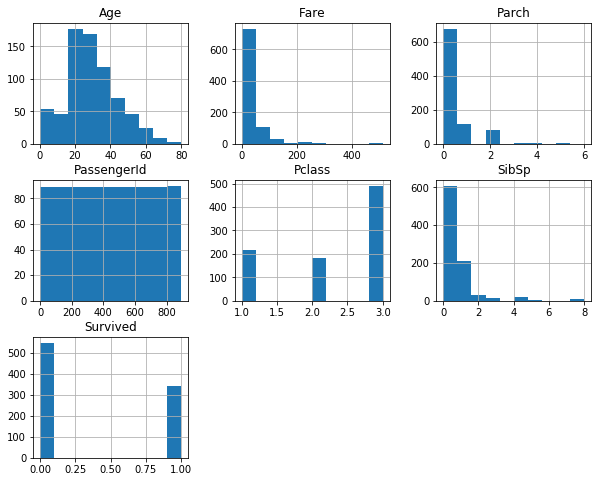

In [64]:
# Visualizar histograma das variáveis numéricas.
train.hist(figsize=(10,8));

In [65]:
# Quais grupos de pessoas tinham mais chances de sobrevivência??

# Agora vou analisar a probabilidade de sobrevivência pelo sexo.
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


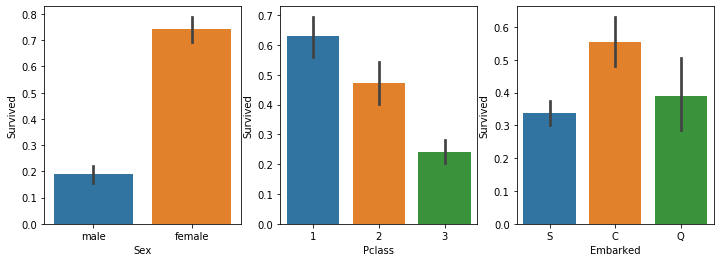

In [66]:
# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

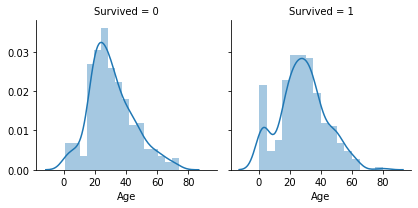

In [67]:
# Visualizar a influência da idade na probalidade de sobrevivência.
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

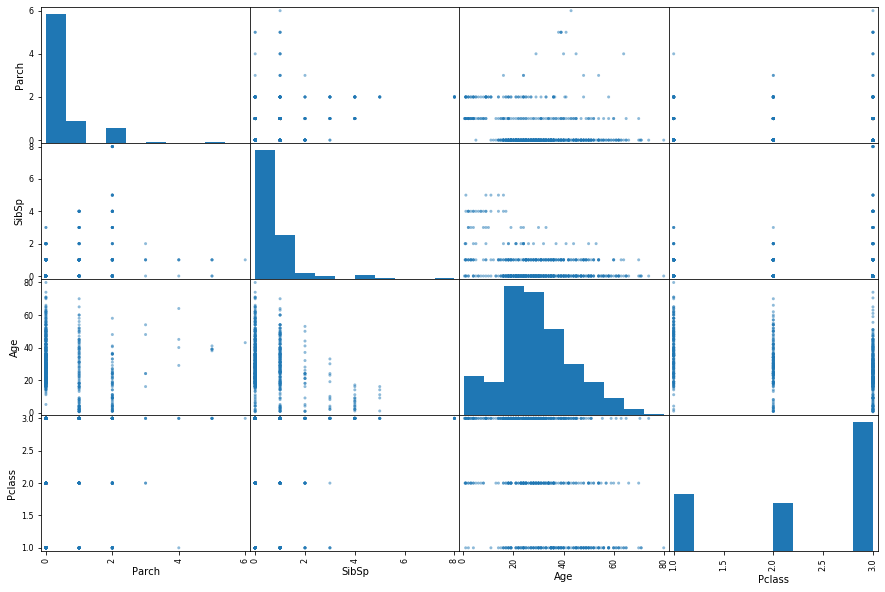

In [68]:
# Plotar uma scatter Matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15, 10));

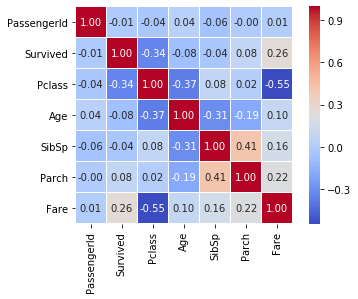

In [69]:
# plotar o heatmap para as variáveis numéricas.
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
           vmax=1.0, square=True, linecolor='white', annot=True);

In [70]:
# Atenção, é letra 'O', e não o número '0'
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pinsky, Mrs. (Rosa)",male,347082,G6,S
freq,1,577,7,4,644


In [25]:
# Olhando esses dados a gente observa que:

# Os valores para Name são únicos, um para cada pessoa;
# Não há missing values para Name e Sex;
# Existem apenas os sexos Masculino e Feminino, sendo que o com maior frequência é o Masculino (577/891 = 65%);
# O Porto no qual embarcaram mais passageiros é o de S = Southampton.

In [26]:
# Preparação de Dados.

In [27]:
# Até o presente momento, tudo o que fizemos foi importar os dados para estruturas
# DataFrame, formular hipóteses, iniciar uma análise exploratória dos dados e visualizar
# graficos e correlações entre aquelas variáveis que julgamos pertinente.

In [71]:
# salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# salvar PassengerId para submissao ao Kaggle
passengerId = test['PassengerId']

# extrair coluna 'Survived' e excluir ela do dataset treino
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


In [72]:
# Selecionar as Features
# No nosso caso, vamos desconsiderar as variáveis 
# ['PassengerId', 'Name', 'Ticket', 'Cabin'], pois aparentemente não parecem relevantes.
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [30]:
# Assim, ficamos com as seguintes variáveis a serem tratadas e preparadas: 
# ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'].

In [73]:
# completar ou apagar valores faltantes nos datasets de treino e teste
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [74]:
# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

In [76]:
# converter 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


In [77]:
# recuperar datasets de treino e teste
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

In [78]:
# Construção do Modelo e Avaliação

In [79]:
# importar bibliotecas do modelo de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [80]:
# criar um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.13


In [82]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# gerar arquivo csv
submission.to_csv('dados/submission_lr.csv', index=False)

In [83]:
# criar um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verificar a acurácia do modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


In [85]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# gerar arquivo csv
submission.to_csv('dados/submission_tree.csv', index=False)

In [87]:
# declarar os valores das variáveis para mim e minha esposa
mauro_santos = np.array([2, 0, 35, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))
fabiola_santos = np.array([2, 1, 30, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))

# verificar se nós teríamos sobrevivido
print("Mauro Santos:\t{}".format(tree_model.predict(mauro_santos)[0]))
print("Fabíola Santos:\t{}".format(tree_model.predict(fabiola_santos)[0]))

Mauro Santos:	0
Fabíola Santos:	1


In [ ]:
# Infelizmente, de acordo com meu próprio modelo, eu não teria sobrevivido ao desastre do Titanic.
# Já minha esposa foi classificada como sobrevivente. Parece que a realidade retratada no filme de
# James Cameron traz algumas verdades.